In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [18]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file, encoding='latin1')
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719Pittsburgh.csv", index=False)

In [2]:
all_data = pd.read_csv("201719Pittsburgh.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data.head()

,ï»¿Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Unnamed: 0
0,27193394.0,4/1/2017 0:59,4/1/2017 1:43,70024.0,2659.0,1012.0,North Shore Trail & Fort Duquesne Bridge,1045.0,S 27th St & Sidney St. (Southside Works),Customer,NaN
1,27193815.0,4/1/2017 1:43,4/1/2017 1:48,70353.0,284.0,1037.0,Frew St & Schenley Dr,1038.0,Boulevard of the Allies & Parkview Ave,Subscriber,NaN
2,27194749.0,4/1/2017 2:35,4/1/2017 3:01,70067.0,1576.0,1010.0,10th St & Penn Ave (David L. Lawrence Conventi...,1010.0,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,NaN
3,27201194.0,4/1/2017 5:05,4/1/2017 7:46,70191.0,9695.0,1005.0,Forbes Ave & Grant St,1043.0,S Millvale Ave & Centre Ave,Customer,NaN
4,27203670.0,4/1/2017 5:35,4/1/2017 5:54,70353.0,1164.0,1038.0,Boulevard of the Allies & Parkview Ave,1047.0,S 22nd St & E Carson St,Subscriber,NaN


In [4]:
del all_data['Unnamed: 0']
del all_data['From station id']
del all_data['To station id']
del all_data['ï»¿Trip id']
all_data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype
0,4/1/2017 0:59,4/1/2017 1:43,70024.0,2659.0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer
1,4/1/2017 1:43,4/1/2017 1:48,70353.0,284.0,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber
2,4/1/2017 2:35,4/1/2017 3:01,70067.0,1576.0,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,4/1/2017 5:05,4/1/2017 7:46,70191.0,9695.0,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer
4,4/1/2017 5:35,4/1/2017 5:54,70353.0,1164.0,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber


In [5]:
all_data['Starttime'] = pd.to_datetime(all_data["Starttime"])
all_data['Stoptime'] = pd.to_datetime(all_data["Stoptime"])
all_data['year'] = all_data["Starttime"].dt.year
all_data['month'] = all_data["Starttime"].dt.month
all_data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,year,month
0,2017-04-01 00:59:00,2017-04-01 01:43:00,70024.0,2659.0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,2017.0,4.0
1,2017-04-01 01:43:00,2017-04-01 01:48:00,70353.0,284.0,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,2017.0,4.0
2,2017-04-01 02:35:00,2017-04-01 03:01:00,70067.0,1576.0,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,2017.0,4.0
3,2017-04-01 05:05:00,2017-04-01 07:46:00,70191.0,9695.0,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer,2017.0,4.0
4,2017-04-01 05:35:00,2017-04-01 05:54:00,70353.0,1164.0,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,2017.0,4.0


In [6]:
all_data['Starthour'] = all_data['Starttime'].dt.hour
all_data['day_of_week'] = all_data['Starttime'].dt.day_name()
all_data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,year,month,Starthour,day_of_week
0,2017-04-01 00:59:00,2017-04-01 01:43:00,70024.0,2659.0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,2017.0,4.0,0.0,Saturday
1,2017-04-01 01:43:00,2017-04-01 01:48:00,70353.0,284.0,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,2017.0,4.0,1.0,Saturday
2,2017-04-01 02:35:00,2017-04-01 03:01:00,70067.0,1576.0,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,2017.0,4.0,2.0,Saturday
3,2017-04-01 05:05:00,2017-04-01 07:46:00,70191.0,9695.0,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer,2017.0,4.0,5.0,Saturday
4,2017-04-01 05:35:00,2017-04-01 05:54:00,70353.0,1164.0,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,2017.0,4.0,5.0,Saturday


In [7]:
all_data['Tripduration'] = all_data['Tripduration']/60
all_data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,year,month,Starthour,day_of_week
0,2017-04-01 00:59:00,2017-04-01 01:43:00,70024.0,44.316667,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,2017.0,4.0,0.0,Saturday
1,2017-04-01 01:43:00,2017-04-01 01:48:00,70353.0,4.733333,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,2017.0,4.0,1.0,Saturday
2,2017-04-01 02:35:00,2017-04-01 03:01:00,70067.0,26.266667,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,2017.0,4.0,2.0,Saturday
3,2017-04-01 05:05:00,2017-04-01 07:46:00,70191.0,161.583333,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer,2017.0,4.0,5.0,Saturday
4,2017-04-01 05:35:00,2017-04-01 05:54:00,70353.0,19.400000,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,2017.0,4.0,5.0,Saturday


In [8]:
all_data['Tripduration'].describe()

count    258740.000000
mean         73.493013
std         248.820331
min           0.000000
25%           8.716667
50%          17.183333
75%          44.483333
max       12057.683333
Name: Tripduration, dtype: float64

In [9]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['Tripduration'] < 240]
no_outliers_data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,year,month,Starthour,day_of_week
0,2017-04-01 00:59:00,2017-04-01 01:43:00,70024.0,44.316667,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,2017.0,4.0,0.0,Saturday
1,2017-04-01 01:43:00,2017-04-01 01:48:00,70353.0,4.733333,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,2017.0,4.0,1.0,Saturday
2,2017-04-01 02:35:00,2017-04-01 03:01:00,70067.0,26.266667,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,2017.0,4.0,2.0,Saturday
3,2017-04-01 05:05:00,2017-04-01 07:46:00,70191.0,161.583333,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer,2017.0,4.0,5.0,Saturday
4,2017-04-01 05:35:00,2017-04-01 05:54:00,70353.0,19.400000,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,2017.0,4.0,5.0,Saturday


In [10]:
no_outliers_data['Tripduration'].describe()

count    247633.000000
mean         30.658097
std          36.450877
min           0.000000
25%           8.450000
50%          16.116667
75%          38.316667
max         239.983333
Name: Tripduration, dtype: float64

In [11]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719PittsburghCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
data = pd.read_csv("201719PittsburghCleaned.csv")
data.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,year,month,Starthour,day_of_week
0,2017-04-01 00:59:00,2017-04-01 01:43:00,70024.0,44.316667,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,2017.0,4.0,0.0,Saturday
1,2017-04-01 01:43:00,2017-04-01 01:48:00,70353.0,4.733333,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,2017.0,4.0,1.0,Saturday
2,2017-04-01 02:35:00,2017-04-01 03:01:00,70067.0,26.266667,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,2017.0,4.0,2.0,Saturday
3,2017-04-01 05:05:00,2017-04-01 07:46:00,70191.0,161.583333,Forbes Ave & Grant St,S Millvale Ave & Centre Ave,Customer,2017.0,4.0,5.0,Saturday
4,2017-04-01 05:35:00,2017-04-01 05:54:00,70353.0,19.400000,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,2017.0,4.0,5.0,Saturday


In [3]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [4]:
users = data['Usertype'].value_counts().keys().to_list()
count = data['Usertype'].value_counts().to_list()

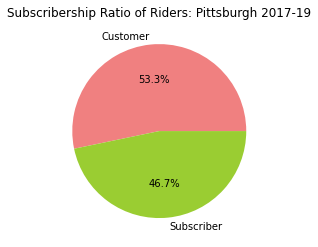

In [5]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Pittsburgh 2017-19")
plt.show()

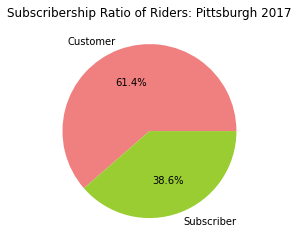

In [6]:
users_17 = df1['Usertype'].value_counts().keys().to_list()
count_17 = df1['Usertype'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Pittsburgh 2017")
plt.show()

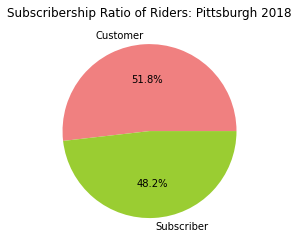

In [7]:
users_18 = df2['Usertype'].value_counts().keys().to_list()
count_18 = df2['Usertype'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Pittsburgh 2018")
plt.show()

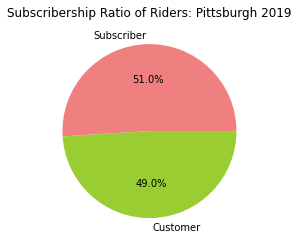

In [8]:
users_19 = df3['Usertype'].value_counts().keys().to_list()
count_19 = df3['Usertype'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Pittsburgh 2019")
plt.show()

In [9]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

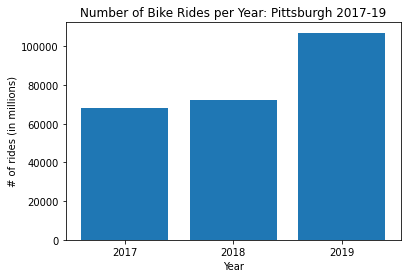

In [10]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides per Year: Pittsburgh 2017-19")
plt.show()

In [11]:
num_bikes_year =[]
num_bikes1 = len(df1['Bikeid'].unique())
num_bikes_year.append(num_bikes1)

In [12]:
num_bikes2 = len(df2['Bikeid'].unique())
num_bikes_year.append(num_bikes2)

In [13]:
df3.head()
num_bikes3 = len(df3['Bikeid'].unique())
num_bikes_year.append(num_bikes3)

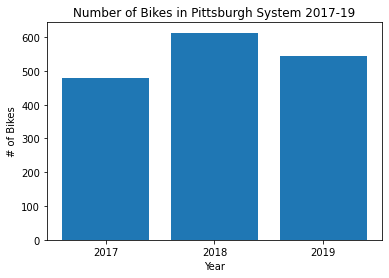

In [14]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Pittsburgh System 2017-19")
plt.show()

In [15]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [32335,33451,33498,32729,35333,43636,36651]

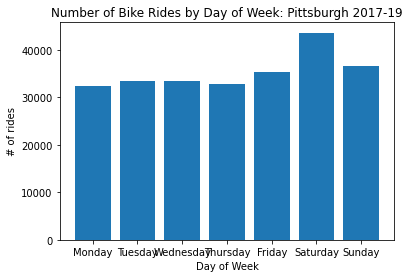

In [16]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: Pittsburgh 2017-19")
plt.show()

In [17]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [18]:
weekend_hours = weekend_df['Starthour'].value_counts().keys().to_list()
weekend_count = weekend_df['Starthour'].value_counts().to_list()

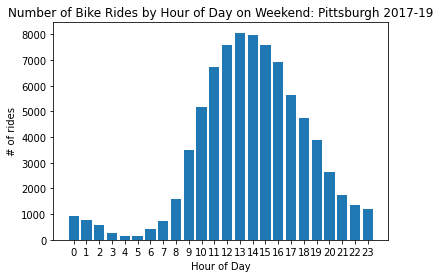

In [19]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Pittsburgh 2017-19")
plt.show()

In [20]:
weekday_hours = weekday_df['Starthour'].value_counts().keys().to_list()
weekday_count = weekday_df['Starthour'].value_counts().to_list()

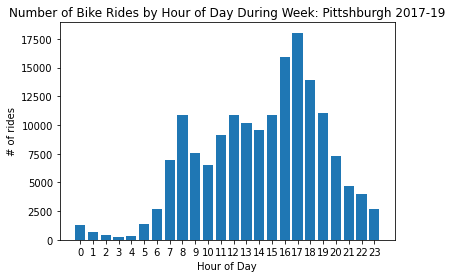

In [21]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Pittshburgh 2017-19")
plt.show()

In [22]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [23]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

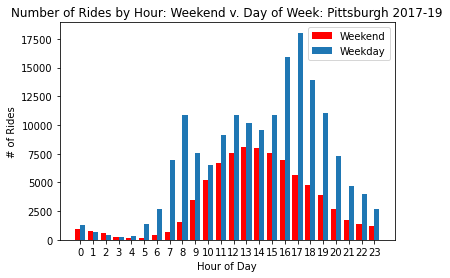

In [24]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Pittsburgh 2017-19')
plt.legend(loc = 'best')
plt.show()

In [25]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

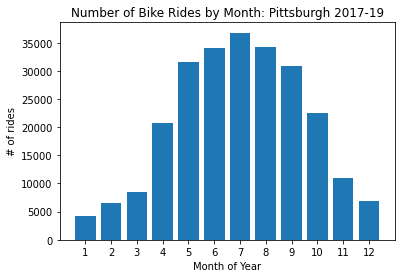

In [26]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: Pittsburgh 2017-19")
plt.show()

In [27]:
#track most common and least common start stations over 3 year period
start_stations = data['From station name'].value_counts().keys().to_list()
num_start = data['From station name'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

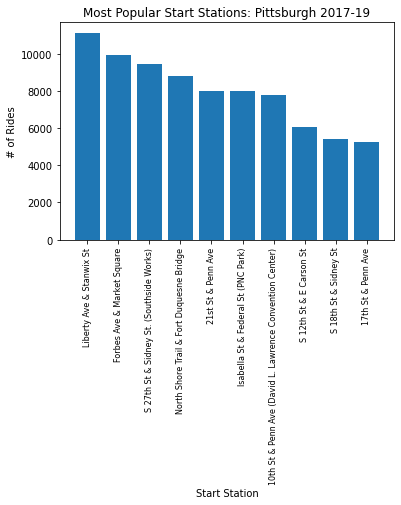

In [28]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: Pittsburgh 2017-19")
plt.show()

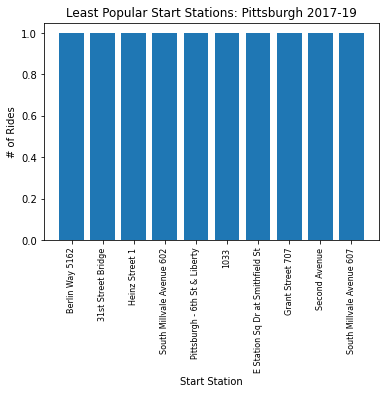

In [29]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Pittsburgh 2017-19")
plt.show()

In [30]:
#track most common and leas common end stations over 3 year period
end_stations = data['To station name'].value_counts().keys().to_list()
num_end = data['To station name'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

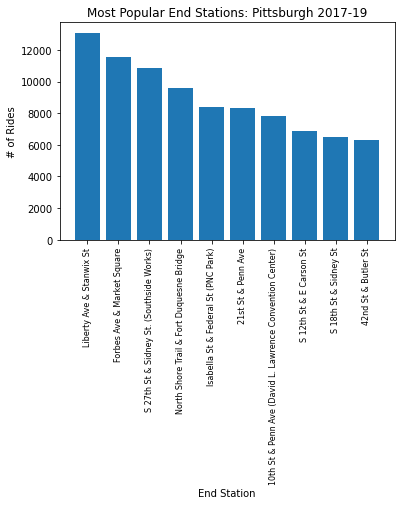

In [31]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Pittsburgh 2017-19")
plt.show()

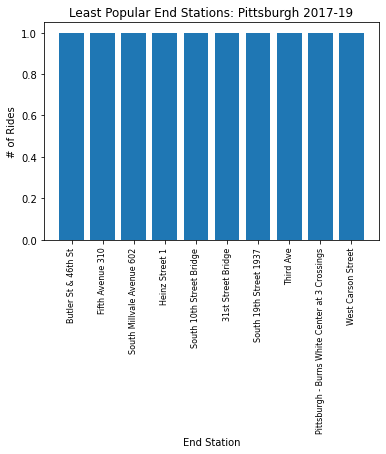

In [32]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Pittsburgh 2017-19")
plt.show()

In [33]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


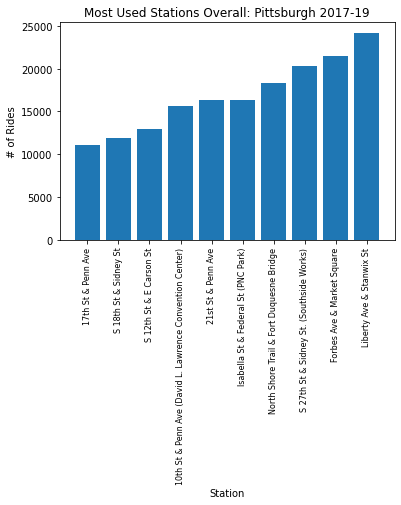

In [34]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: Pittsburgh 2017-19")
plt.show()

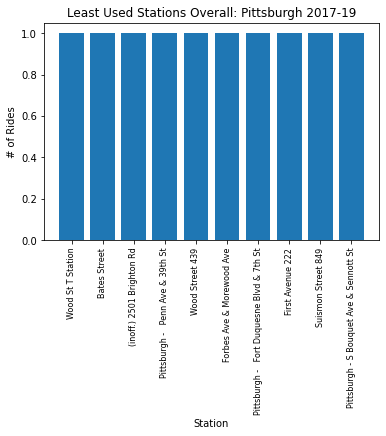

In [35]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Pittsburgh 2017-19")
plt.show()

In [36]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['From station name'], df1['To station name']]).unique()))
num_stations.append(stations_2017)

In [37]:
stations_2018 = len(list(pd.concat([df2['From station name'], df2['To station name']]).unique()))
num_stations.append(stations_2018)

In [38]:
stations_2019 = len(list(pd.concat([df3['From station name'], df3['To station name']]).unique()))
num_stations.append(stations_2019)

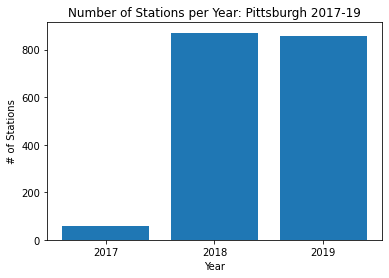

In [39]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Pittsburgh 2017-19")
plt.show()

In [40]:
#determine tripduration statistics (min, max, average, std, etc.)
data['Tripduration'].describe()

count    247633.000000
mean         30.658097
std          36.450877
min           0.000000
25%           8.450000
50%          16.116667
75%          38.316667
max         239.983333
Name: Tripduration, dtype: float64

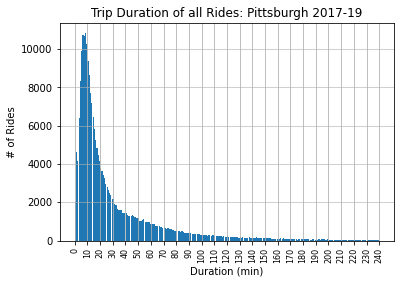

In [41]:
times = data['Tripduration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Pittsburgh 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

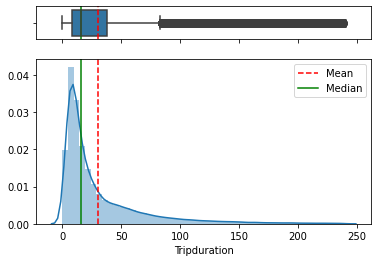

In [42]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['Tripduration'].mean()
median=data['Tripduration'].median()

sns.boxplot(data['Tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['Tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [43]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['Usertype'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [44]:
df_sub['Tripduration'].describe()

count    115752.000000
mean         15.075951
std          19.254397
min           0.066667
25%           6.466667
50%          10.200000
75%          16.533333
max         239.983333
Name: Tripduration, dtype: float64

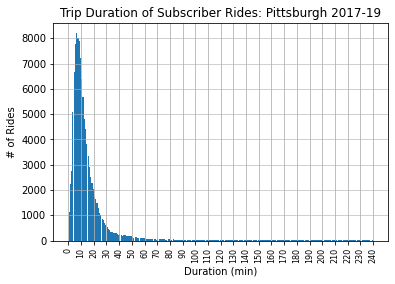

In [45]:
sub_times = df_sub['Tripduration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Pittsburgh 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

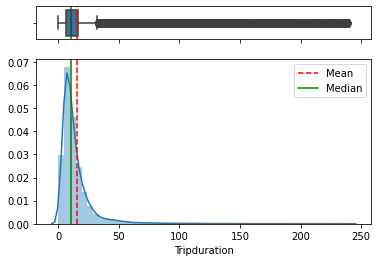

In [46]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['Tripduration'].mean()
median=df_sub['Tripduration'].median()

sns.boxplot(df_sub['Tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['Tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [47]:
df_cust['Tripduration'].describe()

count    131872.000000
mean         44.333890
std          42.062018
min           0.000000
25%          14.000000
50%          30.466667
75%          60.733333
max         239.916667
Name: Tripduration, dtype: float64

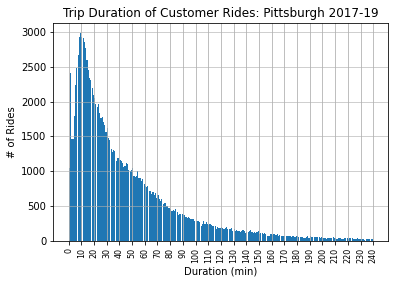

In [48]:
cust_times = df_cust['Tripduration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Pittsburgh 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

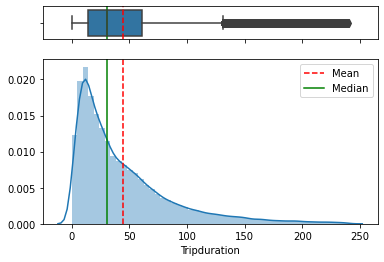

In [49]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['Tripduration'].mean()
median=df_cust['Tripduration'].median()

sns.boxplot(df_cust['Tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['Tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [51]:
weekend_df['Tripduration'].describe()

count    80287.000000
mean        42.346679
std         42.091229
min          0.066667
25%         12.100000
50%         27.700000
75%         58.500000
max        239.983333
Name: Tripduration, dtype: float64

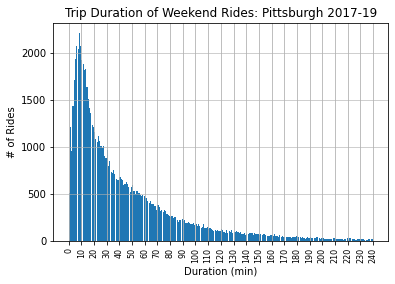

In [52]:
weekend_times = weekend_df['Tripduration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Pittsburgh 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [53]:
weekday_df['Tripduration'].describe()

count    167346.000000
mean         25.050307
std          31.923999
min           0.000000
25%           7.616667
50%          13.283333
75%          27.366667
max         239.900000
Name: Tripduration, dtype: float64

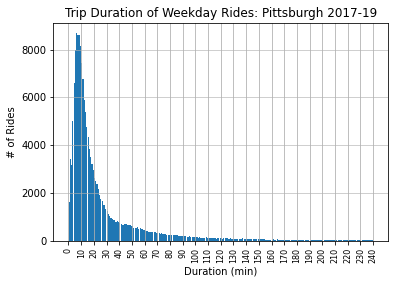

In [54]:
weekday_times = weekday_df['Tripduration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Pittsburgh 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)